In [7]:
pip install qiskit
pip install qiskit-aer
pip install matplotlib

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



In [9]:

# Create a quantum circuit for the Prisoner's Dilemma
def create_quantum_circuit():
    qc = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

    # Create entanglement between two players
    qc.h(0)  # Apply Hadamard to the first qubit
    qc.cx(0, 1)  # CNOT gate to entangle the qubits

    # Measurement
    qc.measure([0, 1], [0, 1])  # Measure both qubits

    return qc


In [10]:

# Function to run the quantum circuit on a simulator
def run_quantum_circuit(qc):
    # Use the Aer simulator
    simulator = AerSimulator()

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qc, simulator)

    # Execute the circuit
    job = simulator.run(transpiled_circuit, shots=4096)

    # Get the results
    result = job.result()
    return result



In [11]:
# Function to simulate the Prisoner's Dilemma game
def prisoners_dilemma():
    # Create the quantum circuit
    qc = create_quantum_circuit()

    # Run the quantum circuit
    result = run_quantum_circuit(qc)

    # Extract counts from the result
    counts = result.get_counts(qc)

    # Print the results
    print("Results of the Quantum Prisoner's Dilemma:")
    print(counts)

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Outcomes')
    plt.ylabel('Counts')
    plt.title("Prisoner's Dilemma Test")
    plt.show()  # This should display a simple histogram


Results of the Quantum Prisoner's Dilemma:
{'00': 2055, '11': 2041}


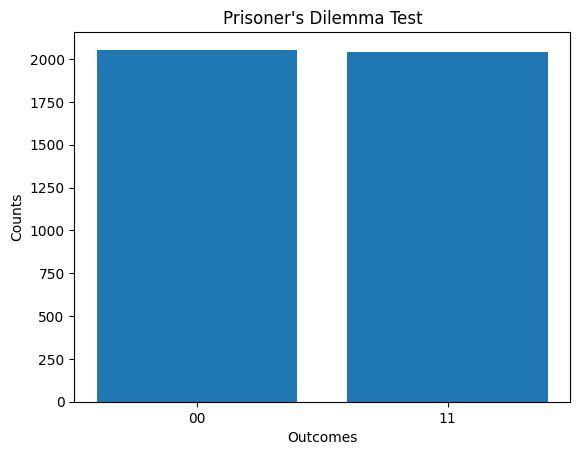

In [12]:
# Execute the Prisoner's Dilemma simulation
prisoners_dilemma()